In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/Assignments/datasets/'

# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr <br>and then use numpy.trapz(tpr_array, fpr_array) <br><a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <br><a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> <br>Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
df = pd.read_csv("5_a.csv")
df["class"] = [0 if prob<0.5 else 1 for prob in df['proba']]
df.head(5)

,y,proba,class
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


CONFUSION MATRIX

In [ ]:
def cal_confusion(y_true,y_pred):
  TP, TN, FP, FN = (0,0,0,0)
  for x,y in zip(y_true,y_pred):
    # correct classification
    if x == y:
      if x == 0:
        TN += 1
      else:
        TP += 1
    #incorrect classification
    else:
      if y == 0:
        FN += 1
      else:
        FP += 1
  
  return (TP,TN,FP,FN)

In [ ]:
TP,TN,FP,FN = cal_confusion(df['y'].values,df["class"].values)
conf_matrix = [[TN,FP],[FN,TP]]
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[0, 100], [0, 10000]]


F1 SCORE

In [ ]:
prec = TP / (TP+FP)
rec = TP / (TP+FN)
f1 = (2*prec*rec)/(rec+prec)
print("F1 Score : ",f1)

F1 Score :  0.9950248756218906


Accuracy

In [ ]:
acc = (TN + TP ) / (FP + FN +TN + TP)
print("Accuracy : ",acc)

Accuracy :  0.9900990099009901


AUC SCORE

In [ ]:
#sort data acc to proba (Descending Order)
df = df.sort_values(by="proba",ascending=False)
df = df.reset_index(drop=True)
df.head(5)

,y,proba,class
0,1.0,0.899965,1
1,1.0,0.899828,1
2,1.0,0.899825,1
3,1.0,0.899812,1
4,1.0,0.899768,1


In [ ]:
def cal_ROC_curve(threshold_list,y_true):
  # thresh = df["proba"].values
  thresh = threshold_list
  fprs = []
  tprs = []

  # find tpr,fpr for each threshold
  for idx,th in enumerate(thresh):
    pred_values = [0]*len(y_true)
    for i in range(idx+1):
      pred_values[i] = 1

    TP,TN,FP,FN = cal_confusion(y_true,pred_values)
    fpr = FP / (FP+TN)
    tpr = TP / (TP+FN)
    fprs.append(fpr)
    tprs.append(tpr)
  
  return (fprs,tprs)


In [ ]:
fprs,tprs = cal_ROC_curve(df['proba'].values,df["y"])

Text(0.5, 1.0, 'ROC Curve')

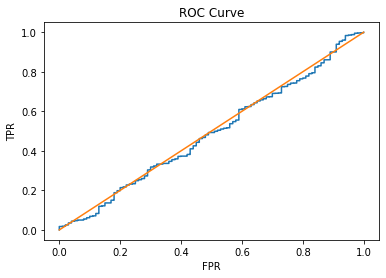

In [ ]:
# plot ROC Curve for visualiztion
plt.plot(fprs,tprs)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

In [ ]:
AUC = np.trapz(tprs,fprs)
print("AUC Value :",AUC)

AUC Value : 0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
df1 = pd.read_csv("5_b.csv")
df1["class"] = [0 if prob<0.5 else 1 for prob in df1['proba']]
df1.head(5)

,y,proba,class
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


CONFUSION MATRIX

In [ ]:
TP1,TN1,FP1,FN1 = cal_confusion(df1['y'].values,df1["class"].values)
conf_matrix_1 = [[TN1,FP1],[FN1,TP1]]
print("Confusion Matrix")
print(conf_matrix_1)

Confusion Matrix
[[9761, 239], [45, 55]]


F1 Score


In [ ]:
prec_1 = TP1 / (TP1+FP1)
rec_1 = TP1 / (TP1+FN1)
f1_2 = (2*prec_1*rec_1)/(rec_1+prec_1)
print("F1 Score : ",f1_2)

F1 Score :  0.2791878172588833


Accuracy

In [ ]:
acc1 = (TN1 + TP1 ) / (FP1 + FN1 +TN1 + TP1)
print("Accuracy : ",acc1)

Accuracy :  0.9718811881188119


AUC

In [ ]:
#sort data acc to proba (Descending Order)
df1 = df1.sort_values(by="proba",ascending=False)
df1 = df1.reset_index(drop=True)
df1.head(5)

,y,proba,class
0,1.0,0.595294,1
1,1.0,0.594808,1
2,1.0,0.592198,1
3,1.0,0.590171,1
4,1.0,0.588718,1


In [ ]:
fprs_1,tprs_1 = cal_ROC_curve(df1['proba'].values,df1["y"])

Text(0.5, 1.0, 'ROC Curve')

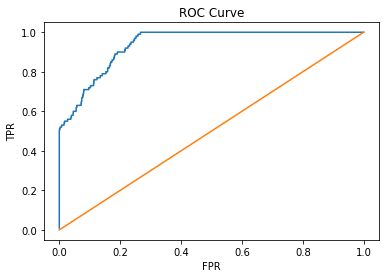

In [ ]:
# plot ROC Curve for visualiztion
plt.plot(fprs_1,tprs_1)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

In [ ]:
AUC_1 = np.trapz(tprs_1,fprs_1)
print("AUC Value :",AUC_1)

AUC Value : 0.9377570000000001


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
df2 = pd.read_csv("5_c.csv")
df2["class"] = [0 if prob<0.5 else 1 for prob in df2['prob']]
#sort data acc to proba (Descending Order)
df2 = df2.sort_values(by="prob",ascending=False)
df2 = df2.reset_index(drop=True)
df2.head(5)

,y,prob,class
0,1,0.957747,1
1,1,0.951437,1
2,1,0.948638,1
3,1,0.944094,1
4,1,0.941113,1


In [ ]:
def minimise_A(threshold_list,y_true):
  # thresh = df["proba"].values
  thresh = threshold_list
  a_list = []

  # find tpr,fpr for each threshold
  for idx,th in enumerate(thresh):
    pred_values = [0]*len(y_true)
    for i in range(idx+1):
      pred_values[i] = 1

    TP3,TN3,FP3,FN3 = cal_confusion(y_true,pred_values)
    a_val = (500*FN3)+(100*FP3)
    a_list.append((a_val,th))
    
  
  return min(a_list)

In [ ]:
min_A,min_threshold = minimise_A(df2['prob'].values,df2["y"])

In [ ]:
print("Minimum Vale of A : ",min_A)
print("Best Threshold Value : ",min_threshold)

Minimum Vale of A :  141000
Best Threshold Value :  0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [3]:
df3 = pd.read_csv("5_d.csv")
df3.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


MSE

In [4]:
MSE = sum([((y-y_pred)**2) for y,y_pred in zip(df3["y"].values,df3["pred"].values)]) / len(df3)
print("Mean Square Error : ",MSE)

Mean Square Error :  177.16569974554707


### MAPE

- MAPE = $ \frac{1}{n} * \sum_{i=0}^{n} \mid \frac{y_{i} - pred_{i}}{y_{i}} \mid$

Issue: \
- if $y_{i} = 0 $, then MAPE = $\frac{0}{0}$

<b>MODIFIED MAPE</b>\
- Modified MAPE = $ \frac{1}{n} * \sum_{i=0}^{n} \mid \frac{y_{i} - pred_{i}}{\overline{y}} \mid  \\ where \space\space \overline{y}=\sum_{i=0}^{n} y_{i}$

In [12]:
error_terms = [abs(y-y_pred) for y,y_pred in zip(df3["y"].values,df3["pred"].values)]
y_mean_n = sum([abs(x) for x in df3["y"]])
mape_score = sum(error_terms)/y_mean_n

print("MAPE SCORE : ",mape_score)

MAPE SCORE :  0.1291202994009687


### R2 Score

In [ ]:
y_mean = np.mean(df3["y"])
ss_res = sum([(y-y_pred)**2 for y,y_pred in zip(df3["y"].values,df3["pred"].values)])
ss_tot = sum([(y-y_mean)**2 for y,y_pred in zip(df3["y"].values,df3["pred"].values)])

r2 = 1 - (ss_res/ss_tot)
print("R2 SCORE : ",r2)

R2 SCORE :  0.9563582786990964


In [ ]:
!jupyter nbconvert --to html "/content/5_Performance_metrics_Instructions.ipynb"

[NbConvertApp] Converting notebook /content/5_Performance_metrics_Instructions.ipynb to html
[NbConvertApp] Writing 359407 bytes to /content/5_Performance_metrics_Instructions.html
